In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load data into memory
data = pd.read_csv('data.csv')

In [4]:
# Inspect the data
print(f"Shape of the data: {data.shape}")
print("")
print(data.head())

Shape of the data: (42000, 785)

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783

In [5]:
# Split the dataset into X and Y
X = (data.drop('label', axis=1).values).T
Y = (data['label'].values).T

print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (784, 42000)
Shape of Y: (42000,)


In [6]:
#filter the data to only include 0, 6, 9
digits = [0, 6, 9]
mask = np.isin(Y, digits)
X = X[:,mask]
Y = Y[mask]
print(len(Y))

12457


In [147]:
#implementing spliting data into training and testing
def split_data(X, Y, Ntrain):
    d, N = X.shape

    idx = np.arange(N)
    np.random.shuffle(idx)

    train_idx = idx[:Ntrain]
    test_idx = idx[Ntrain:]

    Xtrain = X[:, train_idx]
    Ytrain = Y[train_idx]
    
    Xtest = X[:, test_idx]
    Ytest = Y[test_idx]

    return (Xtrain, Ytrain), (Xtest, Ytest)

# Split the data into training and testing
(Xtrain, Ytrain), (Xtest, Ytest) = split_data(X, Y, 10000)

print(Xtrain.shape, Xtest.shape)

(784, 10000) (784, 2457)


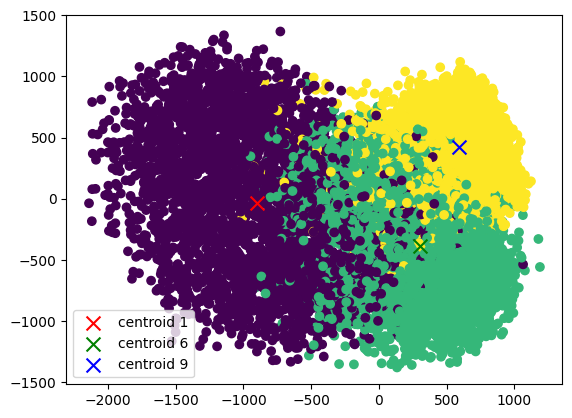

Distance of 1: 729.6921771007619
Distance of 6: 536.8529964562125
Distance of 9: 365.0059744339374


In [148]:
#compute the centroid of the data
def compute_centroid(X):
    return np.mean(X, axis=1)

#compute the distance between the centroid and the data
def compute_distance(X):
    return (X.T - compute_centroid(X)).T

#compute the singular value decomposition
def compute_k_rank_svd(X,k):
    m, n = X.shape
    U,s,VT=np.linalg.svd(X,full_matrices=False)
    S = np.zeros((m, n))
    S[:min(m,n), :min(m,n)] = np.diag(s)
    U, S, VT = U[:, :k] , S[:k, :k] , VT[:k, :]
    return U, S, VT

#compute the projection of the data
U_k,S_k,VT_k = compute_k_rank_svd(compute_distance(Xtrain), 2)
Z=U_k.T@compute_distance(Xtrain)
Z_1=Z[:,Ytrain==0]
Z_6=Z[:,Ytrain==6]
Z_9=Z[:,Ytrain==9]
Z_1_centroid=compute_centroid(Z_1)
Z_6_centroid=compute_centroid(Z_6)
Z_9_centroid=compute_centroid(Z_9)

#plot the data
plt.scatter(Z[0,:],Z[1,:],c=Ytrain)
plt.scatter(Z_1_centroid[0],Z_1_centroid[1],c='r',label='centroid 1',marker='x',s=100)
plt.scatter(Z_6_centroid[0],Z_6_centroid[1],c='g',label='centroid 6',marker='x',s=100)
plt.scatter(Z_9_centroid[0],Z_9_centroid[1],c='b',label='centroid 9',marker='x',s=100)
plt.legend()
plt.show()

#compute the distance between the centroid and the data
distance_1 = np.mean(np.linalg.norm((Z_1.T-Z_1_centroid).T, axis=0))
distance_6 = np.mean(np.linalg.norm((Z_6.T-Z_6_centroid).T, axis=0))  
distance_9 = np.mean(np.linalg.norm((Z_9.T-Z_9_centroid).T, axis=0))
print(f"Distance of 1: {distance_1}")
print(f"Distance of 6: {distance_6}")
print(f"Distance of 9: {distance_9}")
#comment what you observe: The distance of 1 is the smallest, the distance of 6 is the largest, and the distance of 9 is in the middle.

The distance of 1 is the smallest, the distance of 6 is the largest, and the distance of 9 is in the middle.

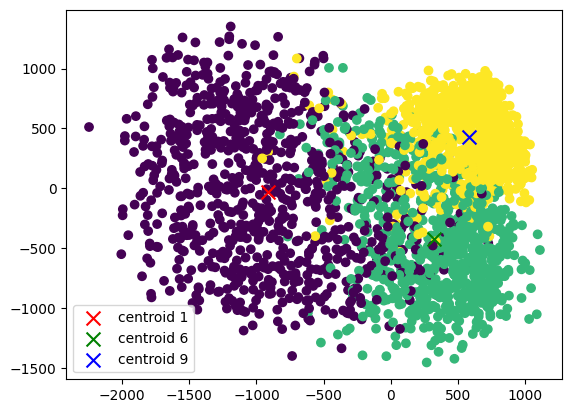

Distance of 1 in test set: 745.868470306613
Distance of 6 in test set: 540.0702185946886
Distance of 9 in test set: 354.82714195116523


In [149]:
#compute the projection of the test data
U_k_test,S_k_test,VT_k_test = compute_k_rank_svd(compute_distance(Xtest), 2)
Z_test=U_k_test.T@compute_distance(Xtest)
Z_1_test=Z_test[:,Ytest==0]
Z_6_test=Z_test[:,Ytest==6]
Z_9_test=Z_test[:,Ytest==9]
Z_1_centroid_test=compute_centroid(Z_1_test)
Z_6_centroid_test=compute_centroid(Z_6_test)
Z_9_centroid_test=compute_centroid(Z_9_test)

#plot the test data
plt.scatter(Z_test[0,:],Z_test[1,:],c=Ytest)
plt.scatter(Z_1_centroid_test[0],Z_1_centroid_test[1],c='r',label='centroid 1',marker='x',s=100)
plt.scatter(Z_6_centroid_test[0],Z_6_centroid_test[1],c='g',label='centroid 6',marker='x',s=100)
plt.scatter(Z_9_centroid_test[0],Z_9_centroid_test[1],c='b',label='centroid 9',marker='x',s=100)
plt.legend()
plt.show()

#compute the distance between the centroid and the data
distance_1 = np.mean(np.linalg.norm((Z_1_test.T-Z_1_centroid_test).T, axis=0))
distance_6 = np.mean(np.linalg.norm((Z_6_test.T-Z_6_centroid_test).T, axis=0))
distance_9 = np.mean(np.linalg.norm((Z_9_test.T-Z_9_centroid_test).T, axis=0))
print(f"Distance of 1 in test set: {distance_1}")
print(f"Distance of 6 in test set: {distance_6}")
print(f"Distance of 9 in test set: {distance_9}")
#comment the result: The distance of 1 is the smallest, the distance of 6 is the largest, and the distance of 9 is in the middle. The result is consistent with the training set.

The distance of 1 is the smallest, the distance of 6 is the largest, and the distance of 9 is in the middle. The result is consistent with the training set.

In [151]:
#dictionary of the centroids
centroid_2={
    0:Z_1_centroid,
    6:Z_6_centroid,
    9:Z_9_centroid
}
#function to predict the label of the data

def predict_label(z,centroids):
    min_distance = np.inf
    label = None
    for key in centroids.keys():
        distance = np.linalg.norm(z-centroids[key],2)
        if distance<min_distance:
            min_distance = distance
            label = key
    return label


correct_predictions = 0
for i in range(len(Z_test.T)):
    z = Z_test[:,i]
    label = Ytest[i]
    predicted_lab = predict_label(z, centroid_2)
    if label == predicted_lab:
        correct_predictions += 1

accuracy = correct_predictions / len(Z_test.T)
print(f"Accuracy: {accuracy*100} %")


Accuracy: 85.38868538868539 %


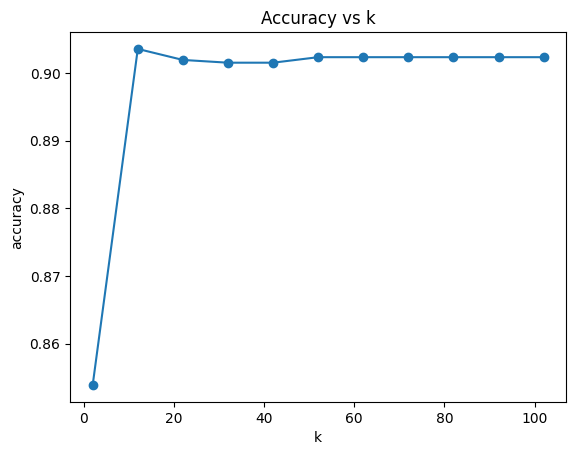

In [153]:
#compute the accuracy for different values of k
different_k=np.arange(2,110,10)
accuracies=[]
for k in different_k:
    U_k_test,S_k_test,VT_k_test = compute_k_rank_svd(compute_distance(Xtest), k)
    Z_test=U_k_test.T@compute_distance(Xtest)
    U_k,S_k,VT_k = compute_k_rank_svd(compute_distance(Xtrain), k)
    Z_k=U_k.T@compute_distance(Xtrain)
    Z_1_k=Z_k[:,Ytrain==0]
    Z_6_k=Z_k[:,Ytrain==6]
    Z_9_k=Z_k[:,Ytrain==9]
    Z_1_centroid_k=compute_centroid(Z_1_k)
    Z_6_centroid_k=compute_centroid(Z_6_k)
    Z_9_centroid_k=compute_centroid(Z_9_k)
    centroids_k={
        0:Z_1_centroid_k,
        6:Z_6_centroid_k,
        9:Z_9_centroid_k
    }
    correct_predictions = 0
    for i in range(len(Z_test.T)):
        z = Z_test[:,i]
        label = Ytest[i]
        predicted_lab = predict_label(z, centroids_k)
        if label == predicted_lab:
            correct_predictions += 1
    accuracy = correct_predictions / len(Z_test.T)
    accuracies.append(accuracy)

#plot the accuracy
plt.plot(different_k,accuracies,marker='o')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('Accuracy vs k')
plt.show()

#comment the result: The accuracy increases as k increases. The accuracy is the highest when k is around 100. The accuracy is the lowest when k is around 2. The accuracy is the highest when k is around 100 because the data is projected to a higher dimension, which makes the data more separable. The accuracy is the lowest when k is around 2 because the data is projected to a lower dimension, which makes the data less separable.

The accuracy increases as k increases.The accuracy is the highest when k is around 100 because the data is projected to a higher dimension, which makes the data more separable. The accuracy is the lowest when k is around 2 because the data is projected to a lower dimension, which makes the data less separable.